<a href="https://colab.research.google.com/github/RogerReateguiUTEC/TareasIAFundamentals/blob/main/Practica3_GeneticAlgorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Inicialización de la población

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from matplotlib import pyplot as plt

def plot_tsp(nodes, route):
    """
    Plot the TSP nodes and route.

    Parameters:
    - nodes: List of tuples containing the coordinates of each node.
    - route: List of node indices representing the TSP route.
    """
    x = [node[0] for node in nodes]
    y = [node[1] for node in nodes]

    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, color='blue', zorder=2)  # Plot nodes


    for i in range(len(route) - 1):
        node1 = route[i]
        node2 = route[i + 1]
        plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    # Connect the last node to the first node to form a loop
    node1 = route[-1]
    node2 = route[0]
    #plt.plot([nodes[node1][0], nodes[node2][0]], [nodes[node1][1], nodes[node2][1]], color='red', zorder=1)  # Plot route

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('TSP Nodes and Route')
    plt.grid(True)
    plt.show()

In [ ]:
N = 5 # num cities
pop_size = 8 # population size
cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))
#print(positions)
#print(distances)


def fitness(solution): # depende del problema
  distance = 0
  for i in range(len(solution)-1):
    distance += distances[solution[i]][solution[i+1]]
  return distance

In [ ]:
import random
import numpy as np


def create_initial_population(pop_size, num_cities):
  population = []
  for i in range(pop_size):
    # crear solucion
    individual = list(np.random.permutation(num_cities))
    population.append(individual)

  return population

[[4, 2, 1, 3, 0], [2, 4, 1, 0, 3], [0, 1, 3, 4, 2], [0, 1, 4, 2, 3], [4, 0, 2, 3, 1], [1, 2, 0, 4, 3], [4, 3, 0, 1, 2], [2, 4, 0, 1, 3]]


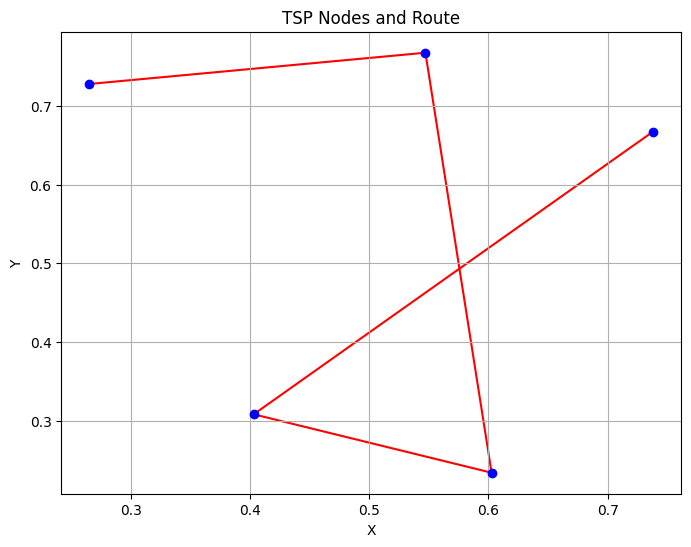

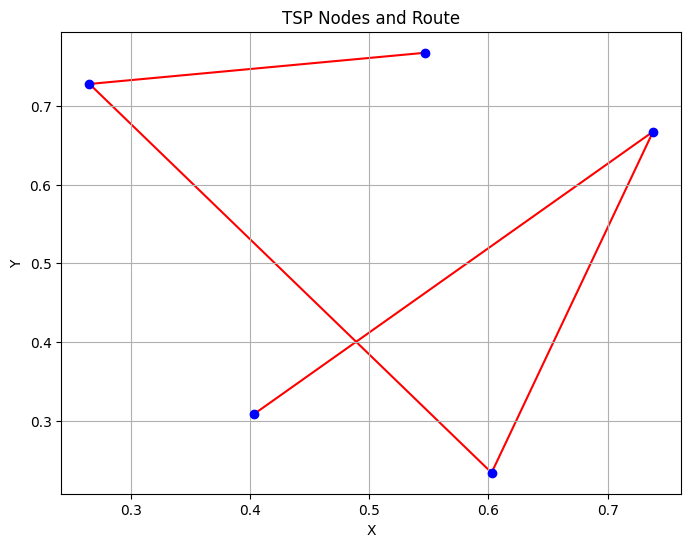

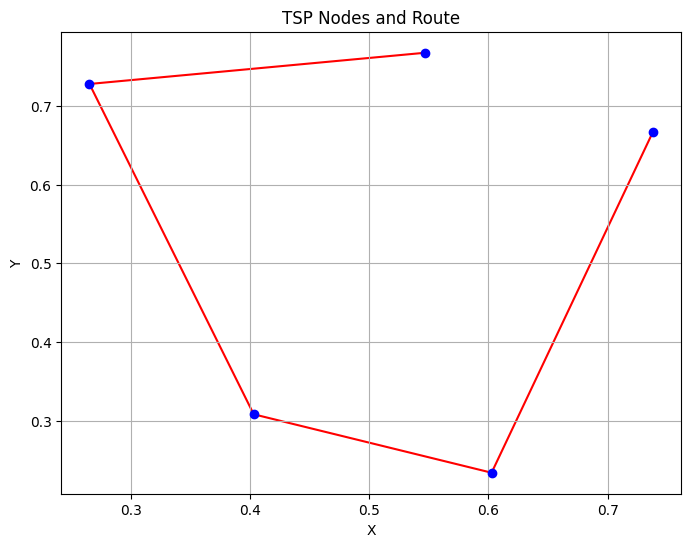

In [ ]:
population = create_initial_population(pop_size, N)
print(population)

plot_tsp(cities, population[0])
plot_tsp(cities, population[1])
plot_tsp(cities, population[2])

In [ ]:
def roulete_wheel_selection(population, all_fitness): # all_fitness -> [ 1, 4, 0, 6, .. ]
  total_fitness = sum(all_fitness)
  selection_probs = [  f / total_fitness  for f in all_fitness   ]
  return population[ np.random.choice( len(population), p= selection_probs) ]


all_fitness = [ fitness(sol) for sol in population ]

print("Size:", len(population))
print("N:", N) # ciudades
print(population)
print(all_fitness)

Size: 8
N: 5
[[4, 2, 1, 3, 0], [2, 4, 1, 0, 3], [0, 1, 3, 4, 2], [0, 1, 4, 2, 3], [4, 0, 2, 3, 1], [1, 2, 0, 4, 3], [4, 3, 0, 1, 2], [2, 4, 0, 1, 3]]
[1.5254393684571768, 1.828334452459282, 1.393582895535956, 1.8185804032184114, 1.3868664014218464, 1.670810171134607, 1.9238651301762566, 1.428504814058348]


In [ ]:
print("selected")
selected = roulete_wheel_selection(population, all_fitness)
print("seleccionado", selected)

selected
seleccionado [4, 0, 2, 3, 1]


In [ ]:
def roulete_wheel_selection_minimization(population, all_fitness):
    max_fitness = max(all_fitness)
    inverted_fitness = [max_fitness - f for f in all_fitness]  # invert fitness
    total_fitness = sum(inverted_fitness)
    selection_probs = [f / total_fitness for f in inverted_fitness]
    return population[np.random.choice(len(population), p=selection_probs)]

print("SELECTED IN MINIMIZATION")
selected =  roulete_wheel_selection_minimization(population, all_fitness)
print("selected:", selected, fitness(selected), "\n")


SELECTED IN MINIMIZATION
selected: [4, 2, 1, 3, 0] 1.5254393684571768 



Crossover

In [ ]:
def single_point_crossover(parent1, parent2):

  cross_over_point = random.randint(1, len(parent1)-1)
  print(cross_over_point)

  offspring1 = parent1[:cross_over_point] + parent2[cross_over_point:]
  offspring2 = parent2[:cross_over_point] + parent1[cross_over_point:]

  return offspring1, offspring2


h1, h2 = single_point_crossover(population[0], population[1])

print("padres:", population[0], population[1])
print("hijos:", h1, h2)

4
padres: [4, 2, 1, 3, 0] [2, 4, 1, 0, 3]
hijos: [4, 2, 1, 3, 3] [2, 4, 1, 0, 0]


In [ ]:
def fill_child(child, parent, end):
    size = len(parent)
    current_pos = (end + 1) % size
    for gene in parent:
        if gene not in child:
            child[current_pos] = gene
            current_pos = (current_pos + 1) % size

def ordered_crossover(parent1, parent2):
  size = len(parent1)
  child1 = [-1]*size
  child2 = [-1]*size

  start, end = sorted( random.sample(range(size), 2 ))

  child1[start:end+1] = parent2[start:end+1]
  child2[start:end+1] = parent1[start:end+1]

  fill_child(child1, parent1, end)
  fill_child(child2, parent2, end)

  return child1, child2

h1, h2 = ordered_crossover(population[0], population[1])
print("padres:", population[0], population[1])
print("hijos:", h1, h2)

padres: [4, 2, 1, 3, 0] [2, 4, 1, 0, 3]
hijos: [4, 2, 1, 0, 3] [2, 4, 1, 3, 0]


In [ ]:
def swap_mutate(individual):
  i, j = np.random.choice(len(individual), 2, replace=False) # two random indices
  new_individual = individual.copy()
  new_individual[i], new_individual[j] = individual[j], individual[i]
  return new_individual

mutated = swap_mutate(population[0])
print("Original: \t", population[0])
print("Mutated: \t", mutated)

Original: 	 [4, 2, 1, 3, 0]
Mutated: 	 [3, 2, 1, 4, 0]


In [ ]:
def select_elite(population, all_fitness, elite_size):   # selecciona los que tengan el menor fitness
  elite_indices = np.argsort(all_fitness)[:elite_size]
  return np.array(population)[elite_indices], elite_indices


all_fitness = [ fitness(sol) for sol in population]
selected_elite, indices = select_elite(population, all_fitness, 2)

print("Population:", population)
print("Fitness:", all_fitness)
print("Selected Elite:", selected_elite)
print("Selected indices:", indices)

# para imprimir con mejor vista
import pandas as pd
data = {'Population': population, 'Fitness': all_fitness}
df = pd.DataFrame(data)
print(df)


Population: [[4, 2, 1, 3, 0], [2, 4, 1, 0, 3], [0, 1, 3, 4, 2], [0, 1, 4, 2, 3], [4, 0, 2, 3, 1], [1, 2, 0, 4, 3], [4, 3, 0, 1, 2], [2, 4, 0, 1, 3]]
Fitness: [1.5254393684571768, 1.828334452459282, 1.393582895535956, 1.8185804032184114, 1.3868664014218464, 1.670810171134607, 1.9238651301762566, 1.428504814058348]
Selected Elite: [[4 0 2 3 1]
 [0 1 3 4 2]]
Selected indices: [4 2]
        Population   Fitness
0  [4, 2, 1, 3, 0]  1.525439
1  [2, 4, 1, 0, 3]  1.828334
2  [0, 1, 3, 4, 2]  1.393583
3  [0, 1, 4, 2, 3]  1.818580
4  [4, 0, 2, 3, 1]  1.386866
5  [1, 2, 0, 4, 3]  1.670810
6  [4, 3, 0, 1, 2]  1.923865
7  [2, 4, 0, 1, 3]  1.428505


Generation 0 | Best distance: 22.382392327563537
Generation 50 | Best distance: 12.440558665291448
Generation 100 | Best distance: 10.88839311961743
Generation 150 | Best distance: 10.140351258292826
Generation 200 | Best distance: 9.556089067018041
Generation 250 | Best distance: 9.008582978439811
Generation 300 | Best distance: 8.444796910320328
Generation 350 | Best distance: 8.170211334842774
Generation 400 | Best distance: 8.084180342289477
Generation 450 | Best distance: 7.799769046271951
Generation 500 | Best distance: 7.7147055012818315
Generation 550 | Best distance: 7.580547393870288
Generation 600 | Best distance: 7.564140783115442
Generation 650 | Best distance: 7.539462406379781
Generation 700 | Best distance: 7.404593240454306
Generation 750 | Best distance: 7.404593240454306
Generation 800 | Best distance: 7.377424964298816
Generation 850 | Best distance: 7.355389586233325
Generation 900 | Best distance: 7.355389586233325
Generation 950 | Best distance: 7.22674065874757


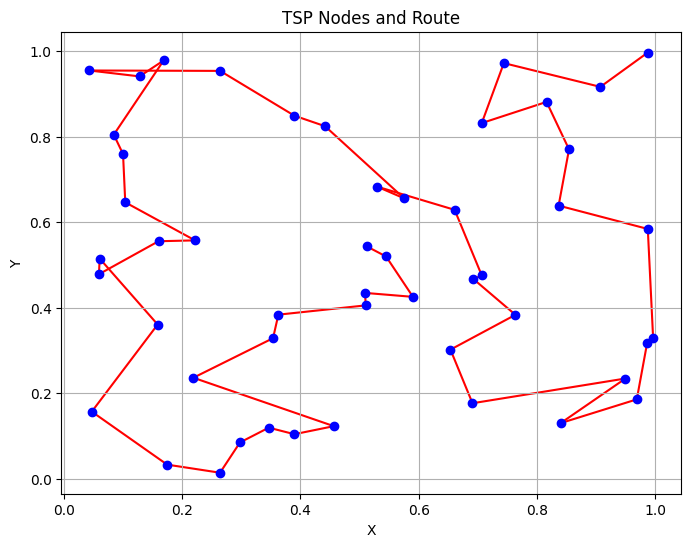

In [ ]:
history = []

def genetic_algorithm(distance_matrix, mutation_rate, generations):
  num_cities = distance_matrix.shape[0]


  population = create_initial_population(pop_size, N)
  all_fitness = [ fitness(sol) for sol in population ]

  for generation in range(generations):
    new_population = []

    # Los mejores de la antugua poblacion
    selected_elite, indices = select_elite(population, all_fitness, elite_size)
    new_population.extend( selected_elite )

    # generamos a la nueva generacion
    while len(new_population) < pop_size:
      parent1 = roulete_wheel_selection_minimization(population, all_fitness)
      parent2 = roulete_wheel_selection_minimization(population, all_fitness)

      child1, child2 = ordered_crossover(parent1, parent2)

      if random.random() < mutation_rate:
        child1 = swap_mutate(child1)

      if random.random() < mutation_rate:
        child2 = swap_mutate(child2)

      new_population.extend([child1, child2])

    population = new_population[:pop_size]
    all_fitness = [ fitness(sol) for sol in population ]


    if generation % 50 == 0:
      print(f"Generation {generation} | Best distance: {min(all_fitness)}")
      history.append([generation, min(all_fitness)])


  best_route_index = np.argmin(all_fitness)
  best_route = population[best_route_index]
  best_distance = all_fitness[best_route_index]

  print(f"Final best distance: {best_distance}")
  return best_route, best_distance


# hyperparametros
pop_size = 100
N = 50
elite_size = 10
mutation_rate = 0.01
generations = 5000

#pop_size = 200
#N = 100
#elite_size = 50
#mutation_rate = 0.001
#generations = 10000

cities = np.random.rand(N, 2)
distances = squareform(pdist(cities, 'euclidean'))

best_route, best_distance = genetic_algorithm(distances, mutation_rate, generations)
plot_tsp(cities, best_route)